In [86]:
import sys
import json
import importlib  

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.append("../")
sys.path.append("../LOCOinPython/")

In [3]:
from utils import ring_to_madx

In [4]:
from LOCOinPython.file_loader.structure_loader import read_structure
ut = importlib.import_module("SKIF-Lattice-Analysis.utils")

# Converter

In [5]:
# seq = ring_to_madx("D:/Work/K500/Regime+e-/RING/PODEMAXR.rin")

# Structure loading

In [6]:
file = "structures/k500.seq"
structure = read_structure(file, energy=0.53)

Structure in the JSON format already exists


# Ideal structure

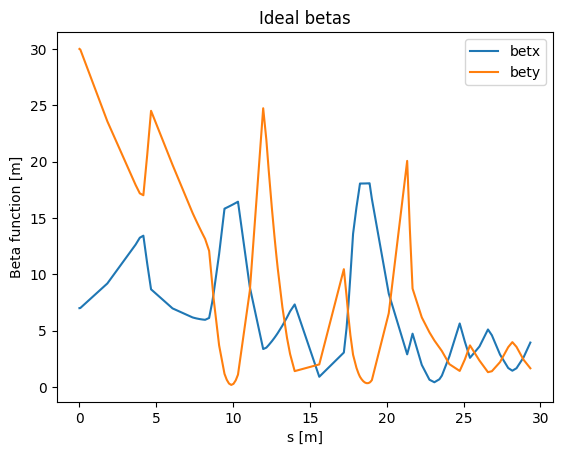

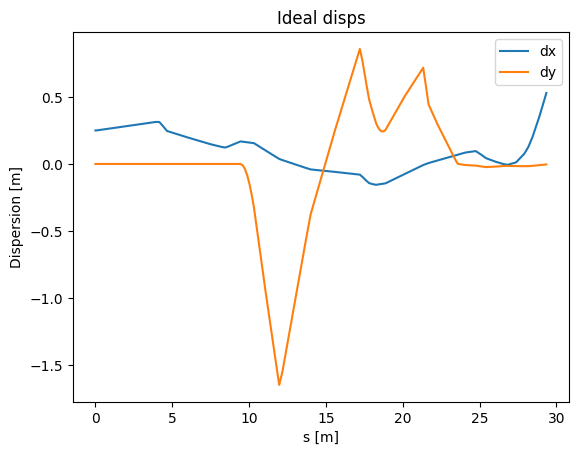

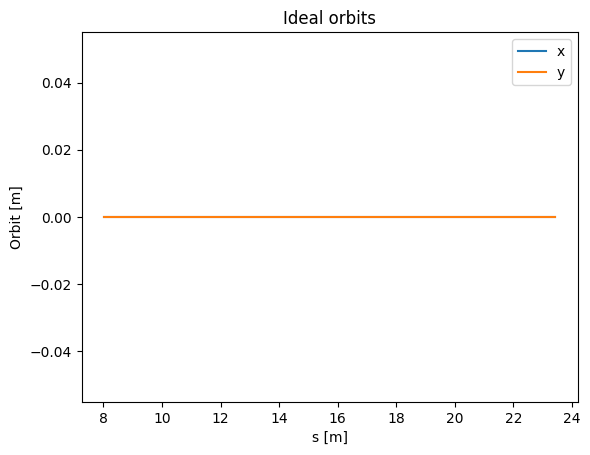

In [7]:
init_optics = ut.get_optics(structure, initial_twiss={"betx": 7, "bety": 30, "dx": 0.25})
ut.plot_optics(init_optics, params_to_show="beta_all", title="Ideal betas")
plt.show()

ut.plot_optics(init_optics, params_to_show="disp_all", title="Ideal disps")
plt.show()

ut.plot_optics(init_optics, params_to_show="orbit", title="Ideal orbits")
plt.show()

In [9]:
from epics import caget

In [15]:
print(caget("CHAN:DT11:I"))

cannot connect to CHAN:DT11:I
None


In [27]:
print(caget("CHAN:DT11:Xe-I"))
print(caget("CHAN:DT11:Ie-I"))
print(caget("CHAN:K500:Iu_skip-I"))
print(caget("CHAN:K500:ready-I"))
print(caget("CHAN:K500:posE_skip-I"))
print(caget("CHAN:K500:Xe_skip-I"))

0.0
0.0
[5.164127  4.6808314 2.4820726]
551006
[]
[]


In [32]:
print("TbT X", caget("VEPP3:4P5:Xext-I"))
print("TbT I", caget("VEPP3:4P5:Iext-I"))
print("TbT X Fast", caget("VEPP3:1P7:Xfast-I"))
print("CO X ?", caget("VEPP3:1P7:I-I"))
print("CO X ?", caget("VEPP3:1P7:Ilast-I"))
print("CO X ?", caget("VEPP3:1P7:SW0I-I"))
print("CO X ?", caget("VEPP3:1P7:SW1X-I"))
print("CO X ?", caget("VEPP3:1P7:SW2X-I"))
print("CO X ?", caget("VEPP3:1P7:SW3X-I"))

TbT X [0.13295753 0.13390425 0.14351287 ... 0.07775601 0.07521451 0.05325186]
TbT I [62.214207 62.208958 62.200287 ... 62.232944 62.124363 62.230312]
TbT X Fast []
CO X ? 37.97310256958008
CO X ? 37.973915100097656
CO X ? 37.969234466552734
CO X ? -0.49391311407089233
CO X ? -0.4094584584236145
CO X ? -0.550749659538269


In [34]:
print(caget("CHAN:DT10:Xu-I"))

cannot connect to CHAN:DT10:Xu-I
None


In [124]:
with open("D://PycharmProjects//K500-Beamline//log//2024_02_13_10_11_46_passing.json", "r") as f:
    data = json.load(f)

# current_limit = 30
data["1P7"]["i"].insert(0, data["1P7"]["i"][0])
data["1P7"]["i"] = [data["1P7"]["i"][i+1] - data["1P7"]["i"][i] if (data["1P7"]["i"][i+1] - data["1P7"]["i"][i]) > 0 else 0 for i in range(len(data["1P7"]["i"])-1)]

In [112]:
folder = "2024_02_13_10_11_46"
dir = f"D://PycharmProjects//K500-Beamline//log//pictures//{folder}//"
num = 8

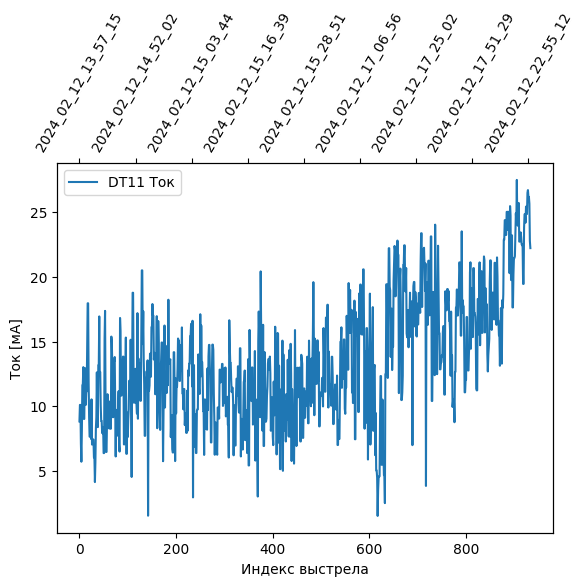

In [130]:
bpm = "DT11"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(data[bpm]["i"], label=f"{bpm} Ток")
ax1.set_xlabel("Индекс выстрела")
ax1.set_ylabel("Ток [мА]")
ax1.legend()
ax2.set_xlim(ax1.get_xlim())

num_ticks = int(len(data[bpm]["time"]) / num)
labels = data[bpm]["time"][::num_ticks]
ticks = range(0, len(data[bpm]["time"]))[::num_ticks]
ax2.set_xticks(ticks)
ax2.set_xticklabels(labels, rotation=60)
plt.savefig(dir + f"{bpm}_current.png", bbox_inches='tight')
plt.show()

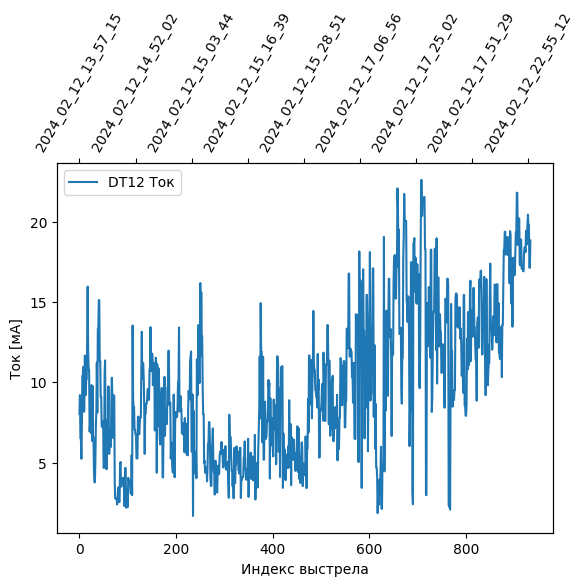

In [131]:
bpm = "DT12"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(data[bpm]["i"], label=f"{bpm} Ток")
ax1.set_xlabel("Индекс выстрела")
ax1.set_ylabel("Ток [мА]")
ax1.legend()
ax2.set_xlim(ax1.get_xlim())

num_ticks = int(len(data[bpm]["time"]) / num)
labels = data[bpm]["time"][::num_ticks]
ticks = range(0, len(data[bpm]["time"]))[::num_ticks]
ax2.set_xticks(ticks)
ax2.set_xticklabels(labels, rotation=60)
plt.savefig(dir + f"{bpm}_current.png", bbox_inches='tight')
plt.show()

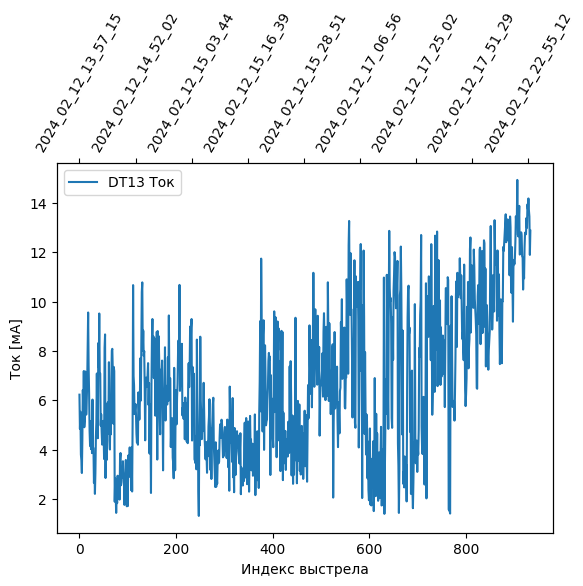

In [136]:
bpm = "DT13"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(data[bpm]["i"], label=f"{bpm} Ток")
ax1.set_xlabel("Индекс выстрела")
ax1.set_ylabel("Ток [мА]")
ax1.legend()
ax2.set_xlim(ax1.get_xlim())

num_ticks = int(len(data[bpm]["time"]) / num)
labels = data[bpm]["time"][::num_ticks]
ticks = range(0, len(data[bpm]["time"]))[::num_ticks]
ax2.set_xticks(ticks)
ax2.set_xticklabels(labels, rotation=60)
plt.savefig(dir + f"{bpm}_current.png", bbox_inches='tight')
plt.show()

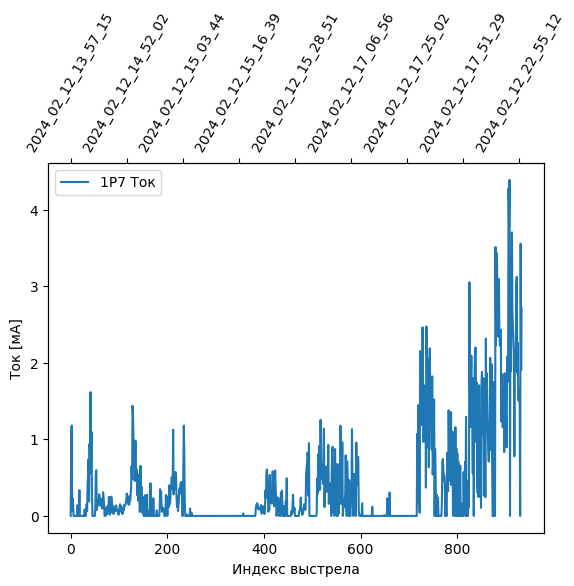

In [132]:
bpm = "1P7"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(data[bpm]["i"], label=f"{bpm} Ток")
ax1.set_xlabel("Индекс выстрела")
ax1.set_ylabel("Ток [мА]")
ax1.legend()
ax2.set_xlim(ax1.get_xlim())

num_ticks = int(len(data[bpm]["time"]) / num)
labels = data[bpm]["time"][::num_ticks]
ticks = range(0, len(data[bpm]["time"]))[::num_ticks]
ax2.set_xticks(ticks)
ax2.set_xticklabels(labels, rotation=60)
plt.savefig(dir + f"{bpm}_current.png", bbox_inches='tight')
plt.show()

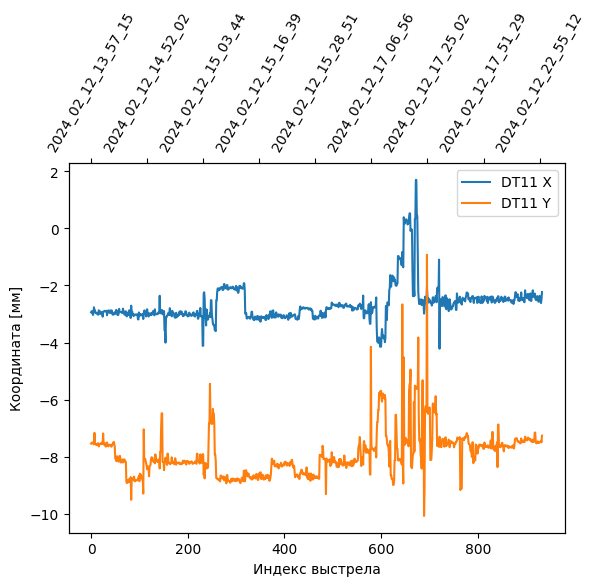

In [133]:
bpm = "DT11"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(data[bpm]["x"], label=f"{bpm} X")
ax1.plot(data[bpm]["y"], label=f"{bpm} Y")
ax1.set_xlabel("Индекс выстрела")
ax1.set_ylabel("Координата [мм]")
ax1.legend()
ax2.set_xlim(ax1.get_xlim())

num_ticks = int(len(data[bpm]["time"]) / num)
labels = data[bpm]["time"][::num_ticks]
ticks = range(0, len(data[bpm]["time"]))[::num_ticks]
ax2.set_xticks(ticks)
ax2.set_xticklabels(labels, rotation=60)
plt.savefig(dir + f"{bpm}_coord.png", bbox_inches='tight')
plt.show()

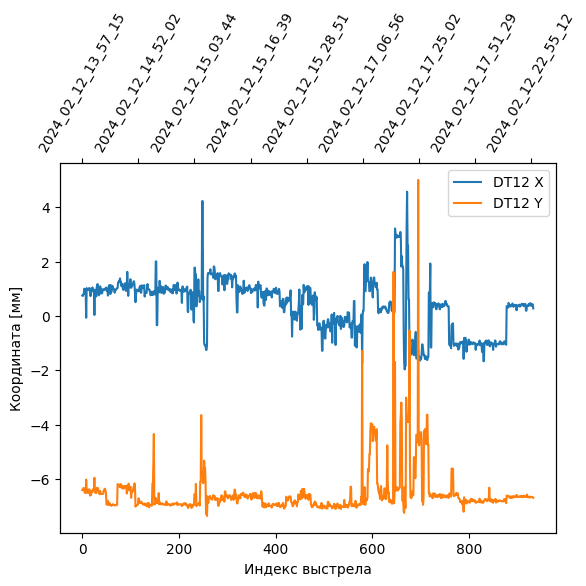

In [127]:
bpm = "DT12"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(data[bpm]["x"], label=f"{bpm} X")
ax1.plot(data[bpm]["y"], label=f"{bpm} Y")
ax1.set_xlabel("Индекс выстрела")
ax1.set_ylabel("Координата [мм]")
ax1.legend()
ax2.set_xlim(ax1.get_xlim())

num_ticks = int(len(data[bpm]["time"]) / num)
labels = data[bpm]["time"][::num_ticks]
ticks = range(0, len(data[bpm]["time"]))[::num_ticks]
ax2.set_xticks(ticks)
ax2.set_xticklabels(labels, rotation=60)
plt.savefig(dir + f"{bpm}_coord.png")
plt.show()

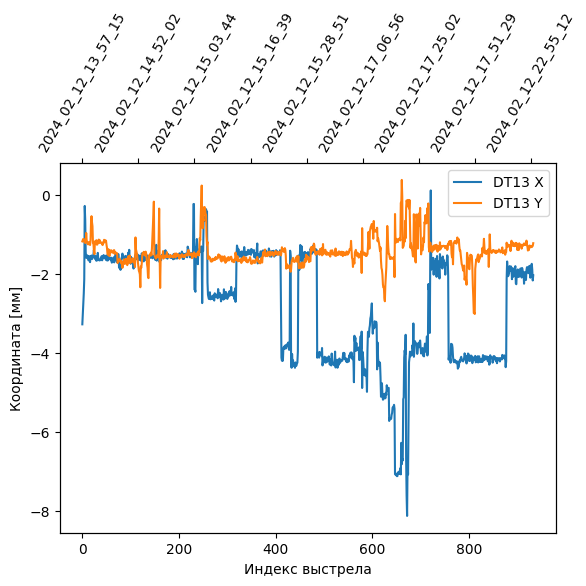

In [134]:
bpm = "DT13"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(data[bpm]["x"], label=f"{bpm} X")
ax1.plot(data[bpm]["y"], label=f"{bpm} Y")
ax1.set_xlabel("Индекс выстрела")
ax1.set_ylabel("Координата [мм]")
ax1.legend()
ax2.set_xlim(ax1.get_xlim())

num_ticks = int(len(data[bpm]["time"]) / num)
labels = data[bpm]["time"][::num_ticks]
ticks = range(0, len(data[bpm]["time"]))[::num_ticks]
ax2.set_xticks(ticks)
ax2.set_xticklabels(labels, rotation=60)
plt.savefig(dir + f"{bpm}_coord.png", bbox_inches='tight')
plt.show()

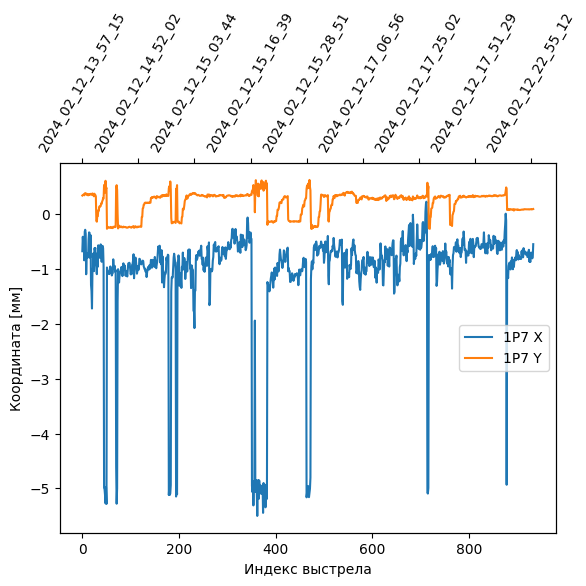

In [135]:
bpm = "1P7"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(data[bpm]["x"], label=f"{bpm} X")
ax1.plot(data[bpm]["y"], label=f"{bpm} Y")
ax1.set_xlabel("Индекс выстрела")
ax1.set_ylabel("Координата [мм]")
ax1.legend()
ax2.set_xlim(ax1.get_xlim())

num_ticks = int(len(data[bpm]["time"]) / num)
labels = data[bpm]["time"][::num_ticks]
ticks = range(0, len(data[bpm]["time"]))[::num_ticks]
ax2.set_xticks(ticks)
ax2.set_xticklabels(labels, rotation=60)
plt.savefig(dir + f"{bpm}_coord.png", bbox_inches='tight')
plt.show()